<font color='blue'>Привет! Поздравляю со вторым выполненным проектом. Он значительно объемнее первого. Меня зову Алексей, я проверю твою работу и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда желательно доработать)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.

---
Апдейт после проверки: классная работа, добавить немного текста - и будет идеал.  
Более подробно см. блок в конце.
</font>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1563]:
import pandas as pd
df = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

In [1564]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [1565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [1566]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [1567]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [1568]:
df.duplicated().sum()

0

### Вывод

При ознакомлении с таблицой было обнаруженно огрмное количество пропусковых в практически по каждому стобцу.
    Скорее всего, такая проблема могла возникнуть ввиду того, что владелец объявления не имел какой-то информации о продаваемой недвижимости, и решил пропустить какой-то из пунктов. Иначе говоря, пропуски в данном дата-сете это человечский фактор.
    Но пропуски влияют на точнсть иследований, поэтому попробуем их заменить, опираясь на имеющиеся данные)
    Приступим!

<font color='green'>Данные загружены и предварительно изучены. Применены методы первичного анализа.  
Приступим!</font>

### Шаг 2. Предобработка данных

In [1569]:
# Посмотрим еще раз на нулевые значения

df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [1570]:
#Напишем функцию для пропущенных значений высоты потолков

df['ceiling_height'] = df['ceiling_height'].transform(lambda x: x.fillna(x.median()))

<s><font color=brown>Можно пойти немного дальше и заполнить высоту потолков медианами в соответствии с этажностью. Ведь у пятиэтажек, девятиэтажек и т.д. высота потолков должна быть более-менее одинкова.

Попробую обосновать, почему не вижу корреляции в этажности дома и высоты потолков в данном датасете.
Например, 5-ти этажка, насколько я знаю, может быть и Сталинкой и Хрущевкой. Высота потолков в ней разная:
Сталинка ~ 3.20
Хрущевка ~ 2.70
Если бы мы знали год постройки дома (а увы(), тогда могли бы классифицировать дома по типу, а потом уже добавить
не то что медиану, а точную высоту потолков( ну или приблизильтельную хотя-бы)
Тоже самое касается всех домов более 10 этажей ( сталинских высоток в Петербурге, как в Мосвке, кажется, нету).
Начиная с 10 этажных домов более менее понятно, но опять же, что это за дом? Скорее всего, что новостройка ( ну ок, назовем новостройками дома с 1990 по наши дни), и здесь еще сложнее. В большинстве таких домов, высота потолка 2.80 (а в некоторых и 3 и 3.20 может), исключения состовляют первые этажи, там всегда потолки чуть-чуть, но выше. И так. Есть ли смысл группировать дома по этажности и считать серднюю высоту потолка и заполнять ее пропуски? Я считаю, что нет.)
P.S. В качестве рекомендации, я бы предложил ввести столбик для заполнения "Год постройки", согласитесь, что это не маловажный фактор при оценке стоимости квартиры, а также фильтр для потенциального покупателя.


<b>UPD <font color=green>Отлично обосновал, и предложение очень полезное, согласен на 100%.

In [1571]:
df['ceiling_height'].isnull().sum()

0

In [1572]:
# Пропуски в столбце "Аппартаменты" - скорее всего, что владелец объявления просто пропустил этот пункт, так как его
# квартира не является аппартаментами, поэтому заменяем пропуски на Fallse
df['is_apartment'] = df['is_apartment'].fillna(False)

In [1573]:
# Пропуски в столбце аппартаменты

df['is_apartment'].isna().sum()

0

In [1574]:
df['is_apartment'].unique()

array([False,  True])

In [1575]:
# а теперь поменяем на более понятные "1" и "0"
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})

In [1576]:
# Закончили с ними

df['is_apartment'].unique()

array([0, 1])

In [1577]:
# Разберемся с балконами
# По моей теории пропуски в графе балкон обусловлены, скорее всего его отсутсвием. Странно не говорить о плюсах,
# когда они етсь
df['balcony'] = df['balcony'].fillna(0)

In [1578]:
df['balcony'].isna().sum()

0

<b>UPD <font color=green>Согласен ;)

<font color='blue'>Краткость - сестра таланта, но старайся все же чуть подробнее пояснять свои действия. Например, почему мы заполняем пропуски в балконах нулями?

In [1579]:
# Есть подозрения на счет букв 'е' и 'ё'
# Для начала приведем все к единому регистру

df['locality_name'] = df['locality_name'].str.lower()

In [1580]:
# Подозрения оправдались(

df['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [1581]:
#до изменений

len(df['locality_name'].unique())

365

In [1582]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е', regex=True)

In [1583]:
#после ихменений

len(df['locality_name'].unique())

331

In [1584]:
# без названия города анализировать нечего, поэтому удалаем строки без города

df = df.dropna(subset=['locality_name'])

In [1585]:
df['locality_name'].isna().sum()

0

In [1586]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [1587]:
# Приведем данный столбец к формату даты

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

## Предобраюотка данных завершена. Ее результатом стало заполнение пропусков в важных для иследования параметров, что позволит более точно провести анализ и ответить на поставленные задачи.

<font color='brown'>Также могу предложить заполнить пропуски в площади кухни следующим образом: посчитать среднее отношение площади кухни к общей площади. После этого мы сможем восстановить площадь кухни, умножив общую площадь на этот коэффициент.

<font color='green'>Но в целом я считаю предобработка удалась, применены верные методы, основные пропуски обработаны, данные приведены к удобным типам. 

### Шаг 3. Посчитайте и добавьте в таблицу

In [1588]:
# Добавим цену за м2

df['price_per_meter'] = df['last_price'] / df['total_area']
df['price_per_meter'] = df['price_per_meter'].round(decimals=2)

In [1589]:
# Добавим день недели, мсяц и год размещения объявления

df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['month_exposition'] = df['first_day_exposition'].dt.month_name()
df['year_exposition'] = df['first_day_exposition'].dt.year

In [1590]:
# Добавим новый параметр - 'этажность' квартиры

def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [1591]:
df['floor_id'] = df.apply(floor_status, axis=1)

In [1592]:
# Также добавим соотношение жилой площади к обшей и площадь кухни к общей площади

df['total_living_area_ratio'] = df['living_area'] / df['total_area']
df['total_kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [1593]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,month_exposition,year_exposition,floor_id,total_living_area_ratio,total_kitchen_area_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,0,...,2.0,755.0,NaN,120370.37,Thursday,March,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,0,...,0.0,NaN,81.0,82920.79,Tuesday,December,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,0,...,2.0,574.0,558.0,92785.71,Thursday,August,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,0,...,3.0,234.0,424.0,408176.10,Friday,July,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,0,...,1.0,48.0,121.0,100000.00,Tuesday,June,2018,другой,0.320000,0.410000


В данной части мы добавили цену за квадратный метр, добавил день недели, месяц и год размещения объявления, добавили новый параметр - 'этажность' квартиры, а также добавили соотношение жилой площади к обшей, и площадь кухни к общей площади.


<font color=green>Так, ну что с этим ты справишься, я не сомневался.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

In [1594]:
import matplotlib.pyplot as plt

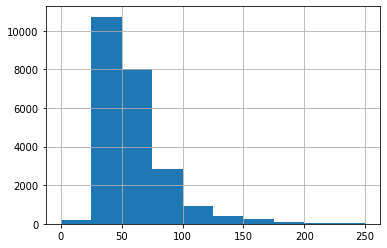

In [1595]:
# Построим гистограмму по общей площади
# Более 80% значений лежит в диапозоне от 25 до 100 м2, похоже на правду.
# Присутствуют крупные объекты более 100 м2, что тоже реально, а вот значения около нуля - скорее всего ошибка в данных

df['total_area'].hist(bins= 10, range=(0, 250))

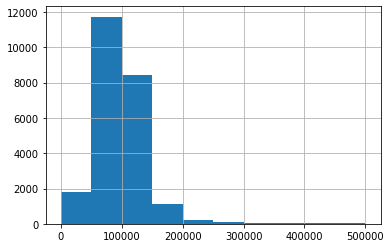

In [1596]:
#Построим гистограмму по цене за м2
# Большинство значений находится в диапозоне от 50 до 150 тысяч, виден сектор недвижимсоти
# с ценой более 150 тысяч, и скорее всего находится в центре города,и опять
# сталкиваемся с нулевыми значениями....

df['price_per_meter'].hist(bins= 10, range=(0, 500000))

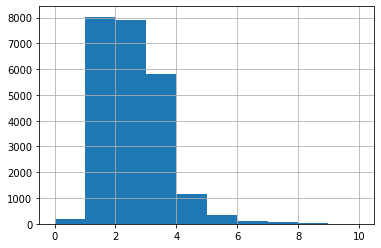

In [1597]:
# Тоже самое проделаем для комнат
# Ничего особенного, все в рамках действительности, и даже 0 здесь не смущает - это студии)

df['rooms'].hist(bins= 10, range=(0, 10))

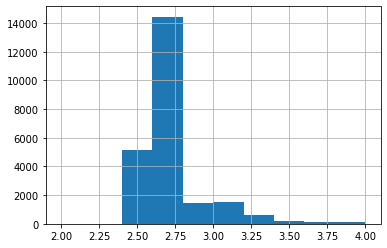

In [1598]:
# И высоты потолков
# Здесь все также в порядке, никаких хобитских домов здесь не наблюдаем

df['ceiling_height'].hist(bins= 10, range=(2, 4))

<font color='green'>Гистограммы успешно построены.

<s><font color='brown'>Но я не вижу никаких выводов. Что мы на них видим?

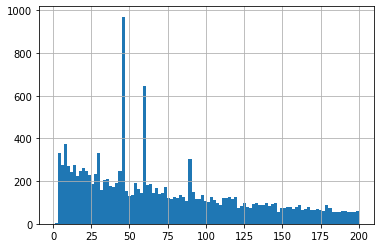

In [1599]:
# Отобразим график по времени размещения объявления
# Бросаются в глаза выбивающиеся значения - скорее всего это объявлений с очень высокой или завышенной относительно
# объекта ценой

df['days_exposition'].hist(bins= 100, range=(1, 200))

При анализе столбцов , были выявлены нулевые неправдопадобные значение, например цена за м2 равной нулю. 
А также выбивающиеся и ох общего ряда значения. Такие выбросы отрицательно могут влиять на результаты иследования.
Постраемся их устранить далее.

<font color='blue'>Давай посмотрим эту гистограмму на масштабе до 200 дней на 100 корзин. Видим ли мы что-то необычное?

<b>UPD: <font color='blue'>На 45й и 60й день, в зависимости от типа объявления, на сервисе происходит автоматическая деактивация объявлений. Можно как вариант не рассматривать эти строки,как несостоявшиеся сделки.

<S><font color='red'>И опять я жду промежуточных выводов.

In [1600]:
df[['total_area', 'last_price', 'days_exposition', 'price_per_meter']].describe()

,total_area,last_price,days_exposition,price_per_meter
count,23650.000000,2.365000e+04,20470.000000,2.365000e+04
mean,60.329069,6.541127e+06,180.753200,9.943225e+04
std,35.661808,1.089640e+07,219.777916,5.033794e+04
min,12.000000,1.219000e+04,1.000000,1.118300e+02
25%,40.000000,3.400000e+06,45.000000,7.661496e+04
50%,52.000000,4.650000e+06,95.000000,9.500000e+04
75%,69.700000,6.799000e+06,231.000000,1.142742e+05
max,900.000000,7.630000e+08,1580.000000,1.907500e+06


In [1601]:
#df.query()
#df.query('total_area >= 12 and total_area <= 115')['total_area'].hist()
#clean_data_query = f'{total_area_query} and {rooms_query} and {ceiling_height_query} and {days_exposition_query}'

In [1602]:
def vybros(df, column,graphic=0,x=10,y=10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filt = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[filt].boxplot([column], figsize=(x,y))
    else:
        return df.loc[filt]

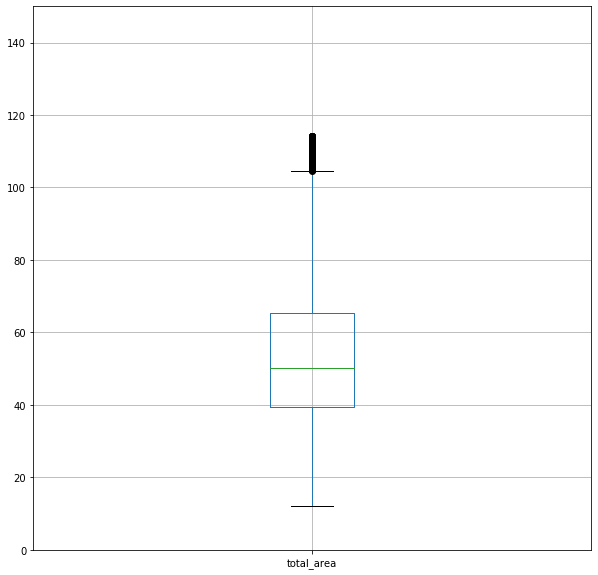

In [1603]:
# Применим данную функцию для общей площади
# Средняя площаль квартиры лежит в диапозоне от 40 до 65 метров, и на мой взгляд, является самой популярной в России
# Также подготовим срез дляочистки данных

vybros(df,'total_area',1,10,10).set_ylim(0,150)
df['total_area_c']=df.query('total_area >= 12 and total_area <= 115')['total_area']

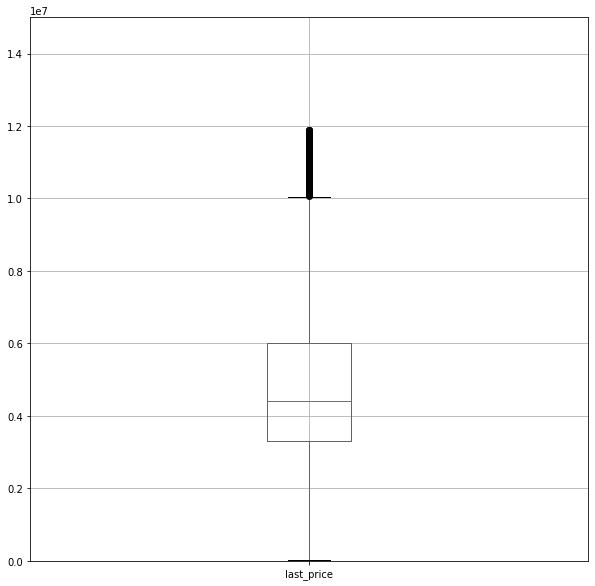

In [1604]:
# для цен на квартиры
# Средний диапозон цена за квартиры начинается от 2.7 до 6 млн, что также является действительностью

vybros(df,'last_price',1,10,10).set_ylim(0,15000000)
df['last_price_c'] =df.query('last_price >= 4.3e+5 and last_price <= 1.2e+7')['last_price']

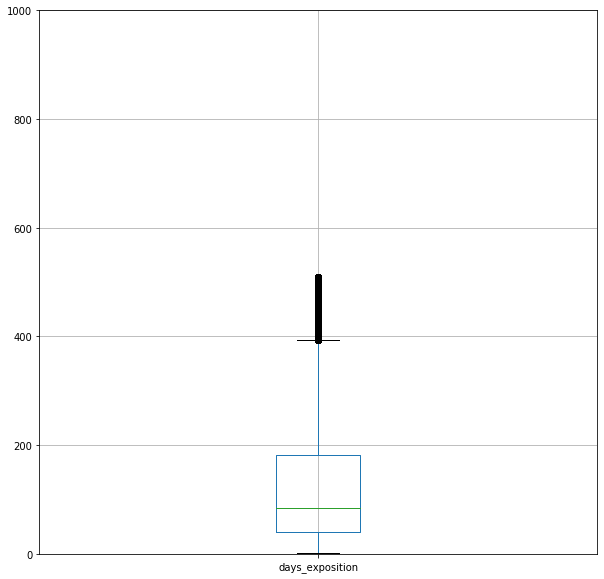

In [1605]:
# Для продолжительности размещения
# Срок продажи квартиры примерно от 50 до 200 дней, все зависит от цены за квартиру, 
# как говорится "продается все - вопрос цены"
vybros(df,'days_exposition',1,10,10).set_ylim(0, 1000)
df['days_exposition_c'] = df.query('days_exposition >= 7 and days_exposition <= 430')['days_exposition']

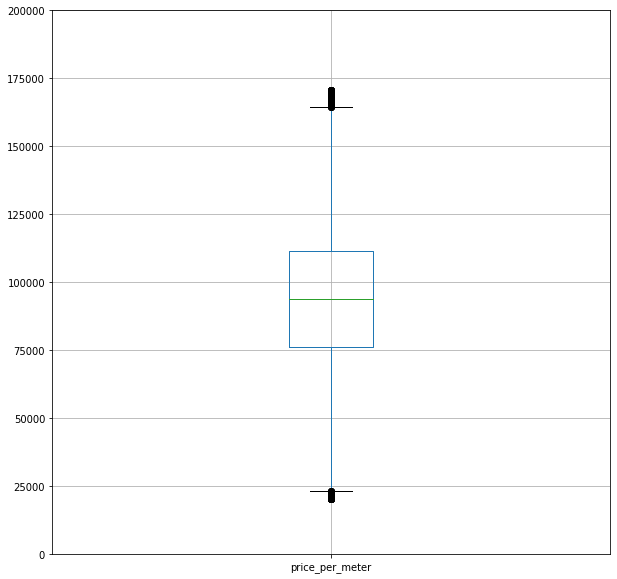

In [1606]:
# для цены на м2
# Данные по ценам за м2 коррелируются с средними показателями площади квартир и их ценой, здесь все в норме

vybros(df,'price_per_meter',1,10,10).set_ylim(0, 200000)
df['price_per_meter_c'] = df.query('price_per_meter >= 25000 and price_per_meter <= 160000')['price_per_meter']

In [1607]:
# узнаем среднее значение для общей площади
vybros(df,'total_area',0)['total_area'].mean()

54.32568508435241

In [1608]:
# среднюю цену на квартиру
vybros(df,'last_price',0)['last_price'].mean()

4838942.090946979

In [1609]:
# продолжительность раземшения
vybros(df,'days_exposition',0)['days_exposition'].mean()

128.39811662055757

In [1610]:
# цену за м2
vybros(df,'price_per_meter',0)['price_per_meter'].mean()

93773.45889844408

In [1611]:
data1 = [
    ['total_area', 60.32, 54],
    ['last_price', 6.5411, 4.8389],
    ['days_exposition', 180, 128],
    ['price_per_meter',99.432, 93.773]
]
for row in data1:
    print('{: <16} | {: >16.2f} | {: >14.2f}'.format(row[0], row[1], row[2]))
    
# В таблице ниже мы видим, что данные до очистки данных и после существенно изменились   

total_area       |            60.32 |          54.00
last_price       |             6.54 |           4.84
days_exposition  |           180.00 |         128.00
price_per_meter  |            99.43 |          93.77


<S><font color='brown'>Проанализировали влияние выбросов на средние, теперь дело за малым - собственно, от них избавиться. Я вижу, ты уверенно владеешь методом `query`. Примени его, чтобы убрать из нашего датафрейма все лишнее и далее уже работать с чистыми данными.

In [1612]:
# Переведем отдаленность от центра из метров в километры
df['cityCenters_nearest_km'] = df['cityCenters_nearest'] / 1000


In [1613]:
df['cityCenters_nearest'].sample(5)

3345         NaN
4343         NaN
14315    14756.0
816          NaN
18995    10257.0
Name: cityCenters_nearest, dtype: float64

In [1614]:
# Посмотрим на взаимосвязь некоторых параметров объявлений

corr = df[['price_per_meter_c',\
           'total_area_c',\
           'days_exposition_c',\
           'cityCenters_nearest',\
           'rooms']].corr().round(decimals=2)

In [1615]:
corr

,price_per_meter_c,total_area_c,days_exposition_c,cityCenters_nearest,rooms
price_per_meter_c,1.00,0.02,-0.03,-0.39,-0.10
total_area_c,0.02,1.00,0.11,-0.18,0.79
days_exposition_c,-0.03,0.11,1.00,-0.02,0.10
cityCenters_nearest,-0.39,-0.18,-0.02,1.00,-0.18
rooms,-0.10,0.79,0.10,-0.18,1.00


На цену квадратного метра сильнее всего влияет удаленность от центра, и это не удивительно)
Количество комнат также влияет на ее окончательную стоимость, а вот день размещения - нет, это мы еще увидем на 
графиках ниже)



<b>UPD <font color=blue>Дата это не количественная переменная, а скорее категориальная, с ней не работает корреляция Пирсона. (Мы не можем сказать, что пятница больше вторника). Здесь придется искать взаимосвязь по-другому. Что мы, собственно, и делаем ниже с помощью графиков.

<font color='green'>Матрица корреляции построена успешно. 

<s><font color='red'>Что мы на ней видим?

In [1]:
# Рассмотрим динамику цена за м2 по годам
# Кризис явно ударил по ценам за м2, но кажется рынок нащупал дно, и график растет вверх - шанс для инвесторов

df.pivot_table(index = 'year_exposition', values = 'price_per_meter_c', aggfunc = 'mean').plot()


NameError: name 'df' is not defined

(0, 200000)

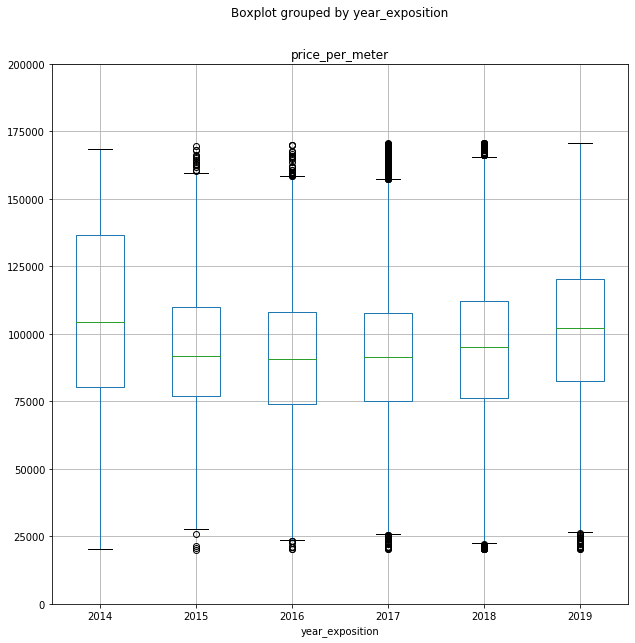

In [1617]:
# Cущественной разницы после очистки данных я не наблюдаю,
# зато график ясно отражает ситуацию на рынке - в кризис цены рекзко упали и продалжали снижаться вплоть до 2019

vybros(df,'price_per_meter',0).boxplot('price_per_meter', by='year_exposition',figsize=(10,10)).set_ylim(0,200000)

(0, 200000)

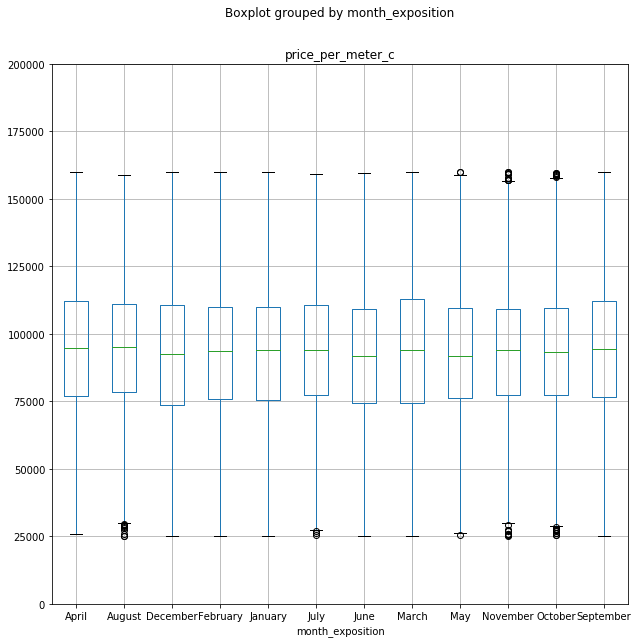

In [1618]:
# Квартиры всегда в цене, это не сезонный товар, поэтому месяц года никак особо не влияет на ее стоимость
df.boxplot('price_per_meter_c', by='month_exposition',figsize=(10,10)).set_ylim(0,200000)


(0, 200000)

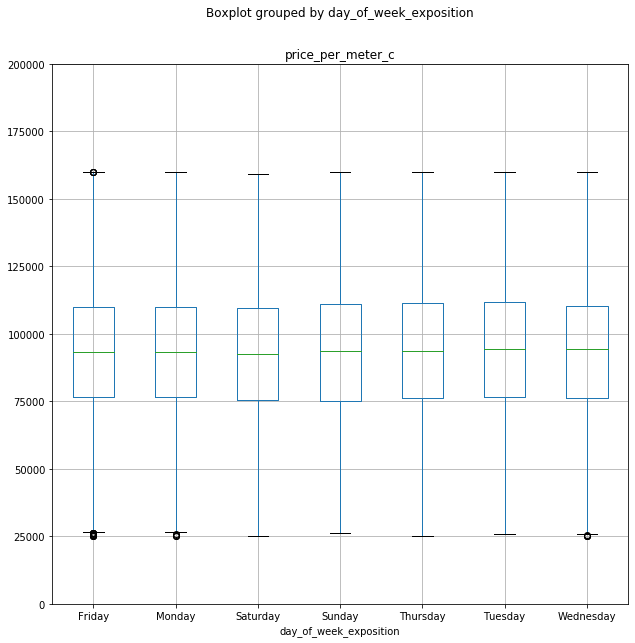

In [1619]:
# Если месяц не влияет на стоимость, то почему должен влиять день недели?

df.boxplot('price_per_meter_c', by='day_of_week_exposition',figsize=(10,10)).set_ylim(0,200000)


<S><font color='red'>Замечательно, но как насчет дней недели и месяцев? Мы же хотим узнать, когда выгоднее покупать квартиру - во вторник или субботу? ;)

<font color='brown'>Должен заметить, что в данном случае диаграммы размаха не очень наглядны. Рекомендую построить линейный график по сводной таблице средних цен, как ты делаешь ниже для расстояния от центра. Обещаю, разница будет налицо.

<b>UPD <font color=blue>Жаль, что так и не построил линейный график по сводной, на нем бы ты увидел более наглядную катрину. Оставлю на домашнее задание.

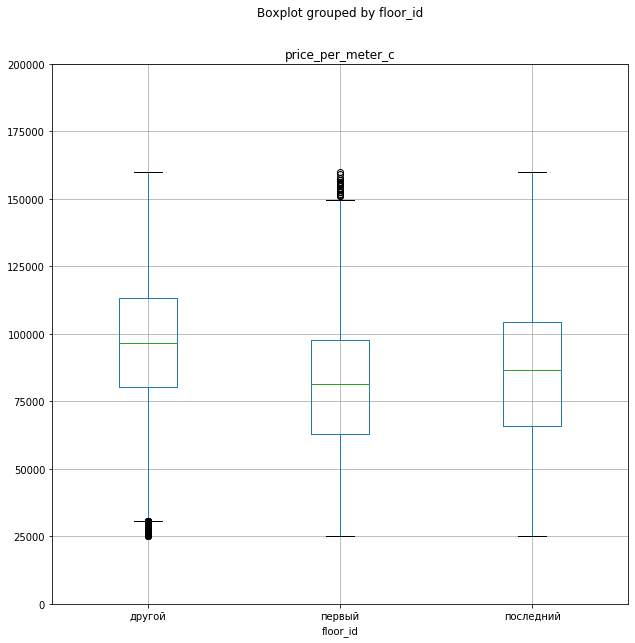

In [1620]:
# Построим график на цены за м2 в зависимости от 'этажности' квартиры

plot = df.boxplot('price_per_meter_c', by='floor_id',figsize=(10,10)).set_ylim(0,200000)

# На графике четко видно, что первый и последний этаж стоят дешевле чем другой, при этом первый этаж дешевле всех

In [1621]:
# Посмотрим количество объявлений в Петербурге и остальных городах

df['locality_name'].value_counts()

санкт-петербург          15721
поселок мурино             556
поселок шушары             440
всеволожск                 398
пушкин                     369
                         ...  
поселок почап                1
деревня хязельки             1
деревня трубников бор        1
деревня нижняя               1
деревня пчева                1
Name: locality_name, Length: 330, dtype: int64

In [1622]:
# Сгрупируем города кроме Петербурга в отдельную группу

def town_status(row):
    if row['locality_name'] == 'санкт-петербург':
        return 'Петербург'
    else:
        return 'Лен область'

In [1623]:
df['town_status'] = df.apply(town_status, axis=1)


In [1624]:
# Посмотрим среднюю цену на новые группы
# Ничего удивительного в том, что в Петербурге цены выше)

df.groupby('town_status').agg({'price_per_meter_c':'mean'}).sort_values(by='price_per_meter_c', ascending=False)

,price_per_meter_c
town_status,
Петербург,105217.236857
Лен область,70328.178231


In [1625]:
# Посмотрим медианную цену на новые группы

df.groupby('town_status').agg({'price_per_meter_c':'median'}).sort_values(by='price_per_meter_c',ascending=False)

,price_per_meter_c
town_status,
Петербург,102484.47
Лен область,69736.84


(0, 200000)

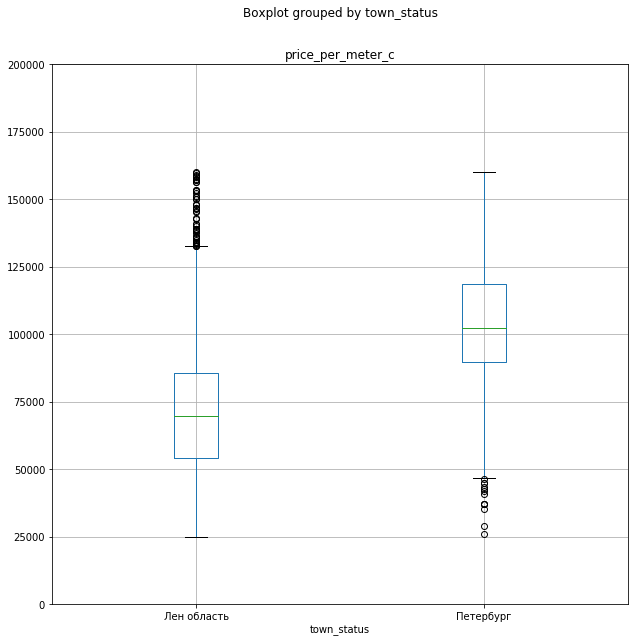

In [1626]:
# Взглянем на график и сравним полученные данные

plot = df.boxplot('price_per_meter_c', by='town_status', figsize=(10,10))
plot.set_ylim(0,200000)

In [1627]:
# Выделим города лидеры по количеству объявлении
# Лидирующая позиция за Петербургом, все хотят жить здесь, а спрос рождает предложение)

top_local = df.groupby('locality_name')\
    .agg({'town_status':'count','price_per_meter_c':'mean'})
top_local = top_local.sort_values('town_status', ascending=False).head(11)

In [1628]:
top_local.sort_values('town_status', ascending=False).head(11)

,town_status,price_per_meter_c
locality_name,,
санкт-петербург,15721,105217.236857
поселок мурино,556,85681.762572
поселок шушары,440,78677.364318
всеволожск,398,67214.252620
пушкин,369,101607.984490
колпино,338,75424.579112
поселок парголово,327,90175.913089
гатчина,307,69294.601447
деревня кудрово,299,92473.547559


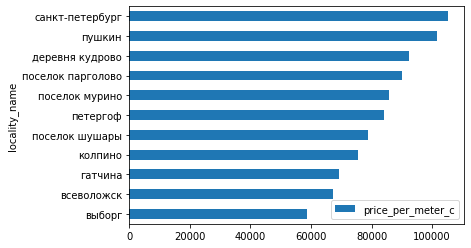

In [1629]:
# посмотрим наглядно

top_local.sort_values('price_per_meter_c', ascending=True).drop('town_status', axis=1).plot(kind='barh')

<font color='green'>Здесь все хорошо.

In [1630]:
# Округлим расстояние до центра до одного знака

df['cityCenters_nearest_km'] = df['cityCenters_nearest_km'].round()

In [1631]:
# Узнаем цену за м2 для каждого километра

cc = df.query('locality_name == "санкт-петербург"').pivot_table(index = 'cityCenters_nearest_km', 
                                                    values = 'price_per_meter_c', 
                                                    aggfunc='median')

In [1632]:
cc.head(10)

,price_per_meter_c
cityCenters_nearest_km,
0.0,108163.270
1.0,113247.860
2.0,110011.315
3.0,104430.170
4.0,109355.805
5.0,114233.890
6.0,115821.270
7.0,113853.175
8.0,116556.290


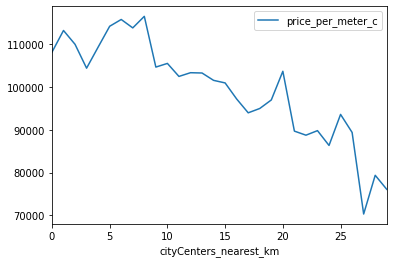

In [1633]:
# Посмотрим наглядно
# На видно, как понижается цена по удаленности от цетра, но можно заметить 
# переодически всплески - элитная загордная недвижимость

cc.reset_index().plot(x = 'cityCenters_nearest_km', y = 'price_per_meter_c')

<S><font color='red'>Далеко же мы забрались - 300 км от города ;) Проверь перевод в километры.

In [1634]:
# Выделим только объявления с удаленностью от центра до 10 км включительно

cc1 = df.query('cityCenters_nearest_km <= 10')

In [1635]:
# Посчитаем среднюю площадь для данной группы

cc1['total_area'].median()

69.65

In [1636]:
# А также среднюю цену за м2

cc1['price_per_meter_c'].median()

110027.86

In [1637]:
# Количество комнат

cc1['rooms'].median()

2.0

In [1638]:
# и среднюю высоту потолков

cc1['ceiling_height'].median()

2.7

In [1639]:
# Посмотрим как меняется цена за m2 от тех или иных условий

cor_cc1 = cc1.corr()\
        .sort_values('price_per_meter_c', ascending=False)\
        .filter(items = ['price_per_meter_c'])\
        .reset_index()
cor_cc1

,index,price_per_meter_c
0,price_per_meter_c,1.000000
1,price_per_meter,1.000000
2,total_kitchen_area_ratio,0.322787
3,last_price,0.273687
4,floors_total,0.245828
5,last_price_c,0.232344
6,floor,0.199572
7,kitchen_area,0.148566
8,balcony,0.142394
9,total_images,0.128548


Здесь никаких сюрпризов- чем ближе к центру, тем выше цена за метр)

In [1640]:
# Выделим группу объявлений с удаленностьб от центра более 10 км

cc2 = df.query('cityCenters_nearest > 10')

In [1641]:
# Посмотрим как меняется цена m2 от тех или иных условий

cor_cc2 = cc2.corr()\
        .sort_values('last_price', ascending=False)\
        .filter(items = ['last_price'])\
        .reset_index()
cor_cc2

,index,last_price
0,last_price,1.000000
1,last_price_c,1.000000
2,price_per_meter,0.755969
3,total_area_c,0.715192
4,total_area,0.652259
5,living_area,0.568117
6,kitchen_area,0.520356
7,price_per_meter_c,0.389477
8,rooms,0.370669
9,ponds_around3000,0.160257


Здесь также все очевидно. Чем дальше от центра, тем дешевле цена за метр, исключения могут составить коттеджные 
поселки

In [1642]:
# Соединим все в одну таблицу для сравнения
cor_cc1.merge(cor_cc2, on= 'index')

,index,price_per_meter_c,last_price
0,price_per_meter_c,1.000000,0.389477
1,price_per_meter,1.000000,0.755969
2,total_kitchen_area_ratio,0.322787,-0.098193
3,last_price,0.273687,1.000000
4,floors_total,0.245828,-0.049162
5,last_price_c,0.232344,1.000000
6,floor,0.199572,0.003326
7,kitchen_area,0.148566,0.520356
8,balcony,0.142394,0.004176
9,total_images,0.128548,0.101716


<font color='green'>Очень наглядное сравнение зависимостей.

<s><font color='red'>Но боюсь, в центральную зону у нас попало несколько меньшая площадь, чем мы бы хотели, поэтому не забудь пересмотреть выводы после доработки.  
    Также призываю сделать короткий вывод по данному пункту (сравнению), а нижележащую ячейку можно отнести уже к общему выводу.

Основными параматрами цены на за м2 ествественно является город, где находится недвижимость, удаленность от центра 
для Петербурга, площадь квартиры и количество комнат.


<font color='green'>Вывод содержит описание всех результатов проведенного анализа и дает ответы на поставленные в задании вопросы. Хорошо.

### Шаг 5. Общий вывод

В данном иследовании мы выяснили:
Квартиры в центре и в Питередороже, чем квартиры в других городах и, и дешевеют по удаленности от центра, но есть 
исключения, возможно это дорогие элитные коттеджные поселки.
Средний срок продажи квартриры находится в промежутке от 150 до 250 дней. Больше всего на этот фактор влияет цена за
конкретный объект - заниженная и или завышенная цена отражается на сроках продажи.


Цены на квартиры были на максимальном уровне в 2014 году, но с наступлением кризиса цены рухнули и начали востанавливаться
лишь к 2019. Естественно, что чем ближе квартира к центру, тем дороже цена за м2.
Также зучив данный датасет, мы можем сказать, что в первую очередь наблюдаются проблемы с заполнением данных пользователем и автоматизацией заполнения некотрых данных со стороны сервиса. В первом случае сделать что-либо сложно,нужно проработать весь жилой фонд для изучения информации по всем параметрам квартир, домов и тд, чтобы автоматизировать заполнение данных и минимизировать участие в данном процессе пользователя, использовать проведенные иследования для рекомендательных цен на то или иное жилье, и тд, а во втором 
нужно доработать автоматизацию по геолокации. Все это приведет к более качественным объявлениям и ускорению продажи квартир, и соответственно лояльности пользователя к сервису.



<font color='green'>Замечательные советы коллегам, это всегда похвально.

<font color='blue'>Совет насчет оформления работы - комментарии по анализу лучше писать в markdown-ячейках, а в коде комментировать сам код.

---

<font color='blue'>Итак, отличная работа, могу только похвалить. Ты показываешь прекрасное владение изучаемым материалом: умеешь очищать и обогощать данные, строишь хорошие графики, понимаешь и используешь понятие корреляции. Грамотно строишь срезы. Отдельно похвалю хорошую автоматизацию вывода графиков и прочей информации.  
    Однако мне катострофически не хватило выводов и промежуточных комментариев, хотя я вижу, что языком ты владеешь отлично. Это очень важный момент и работу я смогу принять, только имея перед глазами четкие и понятные выводы по всем пунктам. Буду ждать доработанный проект, успехов!  

<b>UPD <font color=blue>Отлично поработал, теперь аналитических выводов достаточно и я точно могу принять проект. Но на прощанье порекомендую обязательно построить графики по датам и поискать зависимости. Успехов в изучении статистики!

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод info())
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [ ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [ ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [ ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [ ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод